<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/4_2_%EC%8B%AC%ED%8C%8C%EC%9D%B4%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%ED%95%A8%EC%88%98_%EB%AF%B8%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [1]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,9)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


### 1) 예측 모형의 성능

- 데이터 분석 목표 : 예측 오차가 가장 작은 최적의 예측모형을 구하는 일

- 최적의 모형을 위한 일 : 예측모형 함수의 계수(coefficient = 모수)를 바꾸는 것

- ex. 다음과 같은 선형 예측모형 사용 시
> $$ 
\begin{align}
\hat{y} = w_1 x_1 +  w_2 x_2 + \ldots +  w_N x_N  = w^T x 
\end{align}
$$
 - 우리가 결정할 수 있는 것 : 선형예측모형의 가중치 $w$, 즉 $w_1, w_2, \ldots, w_N$의 값. (가중치 $w$의 값 = 모수)
 - 모수에 따라 예측모형의 성능(performance)이 달라진다. 

- 성능함수(performance function) : 모수를 결정하여 성능을 측정하는 과정 = 다변수 함수를 계산.
성능함수의 값은 클수록 좋다. 

- 손실함수(loss function) = 비용함수(cost function) = 오차함수(error function) : 모수를 입력받아 오차 혹은 오류의 크기를 출력하는 함수를 가장 작게 하는 것을 목표로 하는 함수

- 목적함수(objective function) : 성능함수, 손실함수, 비용함수, 오차함수 등 최적화의 대상이 되는 함수

- 최적화(optmization) : 목적함수가 주어졌을 때 이 목적함수의 값을 가장 크게 혹은 적게 할 수 있는 입력값, 즉 모수를 구하는 것

- 미분(differentiation) : 최적화를 위해 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지 정량적 파악 필요할 때 사용

### 2) 기울기

- 수치적 최적화 : 가장 적은 횟수로 여러가지 $x$값을 시도하여 최적의 값을 찾는 방법

- 기울기(slope) or 민감도(sensitivity) : 수치적 최적화를 위해 증가 및 감소 시키는 정보

- ex. 입력변수의 값이 $x$에서 $x_2$로 $\Delta x = x_2 - x$만큼 달라진다면, 출력변수는 $f(x)$이라는 값에서 $f(x_2)$라는 값으로 $\Delta y = f(x_2) - f(x)$만큼 달라질 것이다. 
> $$ 
\begin{align}
\dfrac{\Delta y}{\Delta x} = \dfrac{f(x_2) - f(x)}{x_2 - x} = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{align}
$$

- 변화율 : $x_2$가 $x_1$에서 얼마나 멀리 떨어져 있는가 즉, $\Delta x$의 크기에 따라 달라진다.

- 기울기(slope) : $dx$값이 0으로 근접할 때의 변화율을 말한다.
> $$ 
\begin{align}
\text{slope} = \lim_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{align}
$$

- 접선(tangent) : 곡선에 대해 한 점만 공통으로 가지는 선.
> 접선이 수평선과 이루는 기울기 : 접선이 $x$ 방향으로 이동한 거리와 $y$ 방향으로 이동한 거리의 비율을 말한다.

- 3차 함수의 그래프
> $$
\begin{align}
x^3 - 3x^2 + x
\end{align}
$$
$$
\begin{align}
x=0 \;\;\rightarrow\;\; \text{slope} = \dfrac{1}{1} = 1
\end{align}
$$
$$
\begin{align}
x=1 \;\;\rightarrow\;\; \text{slope} = \dfrac{-2}{1} = -2
\end{align}
$$


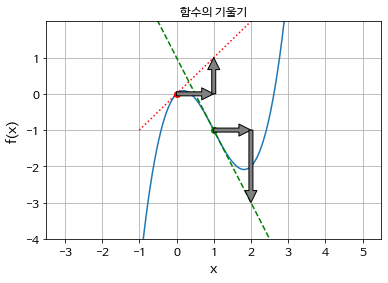

In [2]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

#### 연습 문제 4.2.1

앞의 그래프를 참고하여 다음 표의 $x$ 값들에 대해 기울기의 값이 얼마쯤인지 대략적으로 가늠하여 적어본다.

| $x$  | $-0.5$ |  $0$  |  $0.5$ |  $1$  |  $1.5$ |  $2$  |  $2.5$ |
| ---- |---- | --- | ---- | --- | ---- | --- | ---- |
| 기울기 | $  $  |   $1$ | $ $ |  $-2$  | $ $ | $  $ | $ $ | 

> 답   

| $x$  | $-0.5$ |  $0$  |  $0.5$ |  $1$  |  $1.5$ |  $2$  |  $2.5$ |
| ---- |---- | --- | ---- | --- | ---- | --- | ---- |
| 기울기 | $ 2.5 $  |   $1$ | $ 1 $ |  $2$  | $ -1$ | $ 1 $ | $ 2.5 $ | 



### 3) 수치미분

- 수치미분(numerical differentiation) : 수치적으로 대략적인 기울기를 구하는 공식
> $$ 
\begin{align}
\text{slope} \approx \dfrac{f\left(x + \dfrac{1}{2}dx\right) - f\left(x - \dfrac{1}{2}dx\right)}{dx} 
\end{align}
$$
  - `x` : 기울기를 구할 위치
  - `dx` : 기울기를 구하기 위해 이동할 거리 

- ex. 3차 다항식의 기울기를 $x=0$, $x=1$ 지점에서 수치미분으로 구하는 코드는 다음과 같다. $dx$값은 100만분의 1로 설정하였다.

In [3]:
from scipy.misc import derivative

print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-6))

1.000000000001
-2.000000000002


### 4) 미분

- 미분(differentiation) : 어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어내는 작업

- 도함수(derivative) : 미분으로 만들어진 새로운 함수
> $$ 
\begin{align}
f' = \dfrac{d}{dx}(f) = \dfrac{d}{dx}f = \dfrac{df}{dx}  = \dfrac{d}{dx}(y) = \dfrac{d}{dx}y = \dfrac{dy}{dx} 
\end{align}
$$
 - $f'$ : "f 프라임(prime)"
 - $\dfrac{df}{dx}$ : "df 오버(over) dx"

#### 연습 문제 4.2.2

앞절에서 구한 기울기 값 표를 이용하여 도함수의 그래프를 그려본다.

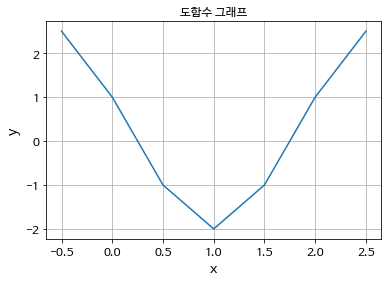

In [34]:
x = np.array([-0.5,0,0.5,1,1.5,2,2.5])
y = np.array([2.5,1,-1,-2,-1,1,2.5])


plt.title("도함수 그래프")
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)
plt.show()

### 4) 미분 가능
- 미분 불가능(not differentiable) : 기울기 값을 정의하기 어려운 함수의 위치. ex. $x=0$인 위치에서 기울기를 정의할 수 없다. 

- 미분 가능(differentiable) : 반대로 기울기를 구할 수 있을 때### 4) 미분 가능
- 미분 불가능(not differentiable) : 기울기 값을 정의하기 어려운 함수의 위치. ex. $x=0$인 위치에서 기울기를 정의할 수 없다. 

- 미분 가능(differentiable) : 반대로 기울기를 구할 수 있을 때

#### 예제

ReLU 함수는 $x<0$인 구간에서는 기울기가 0이고 $x>0$인 구간에서는 기울기가 1이지만 $x=0$인 위치에서는 미분할 수 없다.

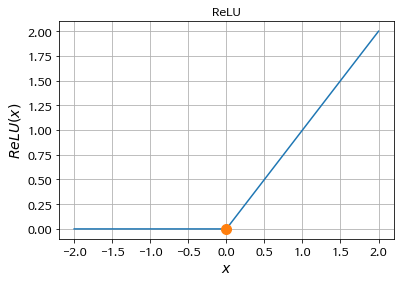

In [4]:
def relu(x):
    return np.where(x > 0, x, 0)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

### 5) 미분공식

* 기본 미분공식
* 선형조합법칙
* 곱셈법칙
* 연쇄법칙

#### 5)-1 기본 미분공식

1. 상수 : 상수를 미분하면 0이 된다.
> $$ 
\begin{align}
\dfrac{d}{dx}(c) = 0 
\end{align}
$$

2. 거듭제곱 : $x$의 $n$ 제곱을 미분하면 $n-1$ 제곱으로 제곱수가 1씩 감소한다.
> $$ 
\begin{align}
\dfrac{d}{dx}(x^n) = n x^{n-1} 
\end{align}
$$

- ex. 거듭제곱공식을 응용하면 다음과 같이 미분할 수 있다.
> $$ 
\begin{align}
\begin{aligned}
\dfrac{d}{dx}&\left(x^3\right) &\;\;&&=& \;\;\;\; 3 x^2 \\
\dfrac{d}{dx}&\left(x^2\right) &=\;\;& 2 x^1 &=& \;\;\;\; 2x \\
\dfrac{d}{dx}&\left(x\right)   &=\;\;& x^1 = 1 \cdot x^0 &=& \;\;\;\; 1 \\
\dfrac{d}{dx}&\left(\dfrac{1}{x}\right)   &=\;\;& \dfrac{d}{dx}x^{-1} = -1 x^{-2} &=& -\dfrac{1}{x^2} \\
\dfrac{d}{dx}&\left(\dfrac{1}{x^2}\right) &=\;\;& \dfrac{d}{dx}x^{-2} = -2 x^{-3} &=& -\dfrac{2}{x^3} \\
\dfrac{d}{dx}&\left(\dfrac{1}{x^3}\right) &=\;\;& \dfrac{d}{dx}x^{-3} = -3 x^{-4} &=& -\dfrac{3}{x^4} 
\end{aligned}
\end{align}
$$

3.  로그 : 로그함수를 미분하면 $x^{-1}$이 된다.
> $$ 
\begin{align}
\dfrac{d}{dx}(\log x) = \dfrac{1}{x} 
\end{align}
$$

4. 지수 : 밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.
> $$ 
\begin{align}
\dfrac{d}{dx}(e^x) = e^x
\end{align}
$$

#### 5)-2 선형조합법칙

- 어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.
> $$ 
\begin{align}
\dfrac{d}{dx}(cf) = c \cdot \dfrac{df}{dx}
\end{align}
$$

- 어떤 두 함수를 더한 함수를 미분한 결과는 원래 함수의 도함수를 더한 것과 같다.
> $$ 
\begin{align}
\dfrac{d}{dx}\left(f_1 + f_2\right) = \dfrac{df_1}{dx} +  \dfrac{df_2}{dx}
\end{align}
$$

- 선형조합(linear combination) : 각 함수의 도함수를 선형조합한 것과 같다.
> $$ 
\begin{align}
\dfrac{d}{dx}\left(c_1 f_1 + c_2 f_2 \right) = c_1 \dfrac{df_1}{dx} + c_2 \dfrac{df_2}{dx}
\end{align}
$$

- ex. 
> $$
\begin{align}
y = 1 + 2x + 3x^2 + 4\exp(x) + 5\log(x)
\end{align}
$$ 
$$
\begin{align}
\dfrac{dy}{dx} = 2 + 6x + 4\exp(x) + \dfrac{5}{x}
\end{align}
$$

- ex.
> $$
\begin{align}
f(x) = x^3 - 3x^2 + x
\end{align}
$$
$$
\begin{align}
f'(x) = 3x^2 - 6x + 1
\end{align}
$$


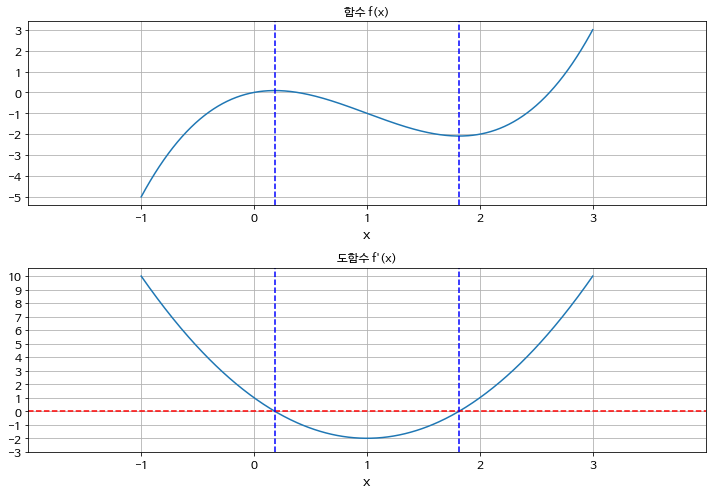

In [5]:
def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('함수 f(x)')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("도함수 f'(x)")
plt.axhline(0, c="r", ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.tight_layout()
plt.show()

#### 5)-3 곱셈법칙

- 곱셈법칙 : 어떤 함수의 형태가 두 함수를 곱한 것과 같을 때, 각 개별 함수의 도함수를 사용하여 원래 함수의 도함수를 구하는 것
> $$  
\begin{align}
\dfrac{d}{dx}\big( f  \cdot g \big) = f \cdot  \dfrac{dg}{dx} + \dfrac{df}{dx} \cdot g 
\end{align}
$$

- ex. 
> $$
\begin{align}
f = x e^x
\end{align}
$$
$$
\begin{align}
\dfrac{df}{dx} = x e^x + e^x
\end{align}
$$

#### 5)-4 연쇄법칙

- 연쇄법칙(chain rule) : 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용할 수 있다.
> $$ 
\begin{align}
\begin{aligned}
f(x) &= h(g(x)) \\
\dfrac{df}{dx} &= \dfrac{dh}{dg} \cdot \dfrac{dg}{dx} \\
\end{aligned}
\end{align}
$$

- ex. 정규분포(Gaussian normal distribution)의 확률밀도함수(probability density function)의 도함수를 구하는 식
> $$
\begin{align}
\begin{aligned}
f &= \exp \dfrac{(x-\mu)^2}{\sigma^2} \\
f &= \exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2} \;,\;\;\;\;   y = x-\mu \\
\dfrac{df}{dx} &= \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx} \\
\dfrac{df}{dz}  &= \exp(z) = \exp \dfrac{(x-\mu)^2}{\sigma^2} \\
\dfrac{dz}{dy}  &=  \dfrac{2y}{\sigma^2} = \dfrac{2(x-\mu)}{\sigma^2} \\
\dfrac{dy}{dx}  &=  1 \\
\dfrac{df}{dx} &=  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}
\end{aligned}
\end{align}
$$

- ex. 로그 함수에 연쇄법칙을 적용
> $$ 
\begin{align}
\begin{aligned}
\dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} 
\end{aligned}
\end{align}
$$

#### 연습 문제 4.2.3

다음 함수를 미분하라. 이 식에서 $k$, $a$, $b$는 변수가 아니라 상수다.

(1)

$$
\begin{align}
f(x) = x^3 - 1
\tag{4.2.34}
\end{align}
$$

> 답 : $ 3x^2 $

(2)

$$
\begin{align}
f(x) = \log (x^{2}-3k)
\tag{4.2.35}
\end{align}
$$

> 답 : $ g(x) = x^2 - 3k \\
f(g) = \log g\\
\dfrac{1}{g} \cdot 2x = \dfrac{2x}{x^2-3k} $

(3)

$$
\begin{align}
f(x) =\exp({ax^b})
\tag{4.2.36}
\end{align}
$$

> 답 : $ g(x) = ax^b \\
f(g) = \exp g \\
\exp g \cdot abx^{b-1} = abx^{b-1} \exp (ax^b)$


### 6) 2차 도함수

- 2차 도함수 : 도함수를 한 번 더 미분하여 만들어진 함수
> 2개의 prime 기호($''$)를 붙이거나 $\dfrac{d^2}{dx^2}$ 기호로 표시

- ex. $y = f(x)$라는 함수를 두 번 미분하여 구한 2차 도함수는 다음과 같이 표기
> $$ 
\begin{align}
f'' = \dfrac{d^2}{dx^2}(f) = \dfrac{d^2}{dx^2}f = \dfrac{d^2f}{dx^2} 
= \dfrac{d^2}{dx^2}(y) = \dfrac{d^2}{dx^2}y = \dfrac{d^2y}{dx^2} 
\end{align}
$$

- 2차 도함수 = 볼록도(convexity) : 도함수의 기울기. 
> 양수 : 도함수 값이 증가 (볼록(convex))
> 음수 : 도함수 값이 감소 (오목(concave))

- ex. 다음 그래프의 함수는 $f''(x)$가 음수인 구간($ x < 1$)에서는 오목하고 $f''(x)$가 양수인 구간($ x > 1$)에서는 볼록하다.



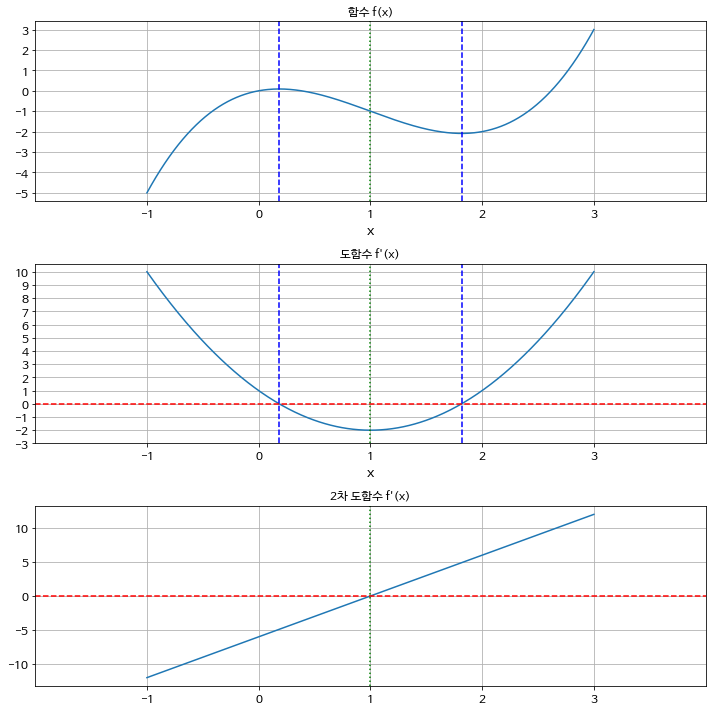

In [6]:
def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("도함수 f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f'(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c="g", ls=":")

plt.tight_layout()
plt.show()

### 7) 편미분

- 편미분(partial differentiation) : 둘 이상의 독립변수를 가지는 다변수 함수의 미분 시 기울기는 하나의 변수에 대해서만 구할 수 있다. 여러개의 도함수 발생 될 수 있음
> $$ 
\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x}
\end{align}
$$
$$ 
\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} 
\end{align}
$$

- 어떤 하나의 독립 변수에 대해 미분할 때는 다른 독립 변수를 상수로 생각하면 된다.

- ex. 
> $$
\begin{align}
f(x,y) = x^2 + 4xy + 4y^2
\end{align}
$$
$$
\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y
\end{align}
$$
$$
\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y
\end{align}
$$

### 8) 다변수 함수의 연쇄법칙

- ex 1.

$$ 
\begin{align}
\begin{aligned}
y_1 &= f_1(x) \\
y_2 &= f_2(x) \\
 & \vdots \\
y_N &= f_N(x) 
\end{aligned}
\end{align}
$$

$$
\begin{align}
z = g(y_1, y_2, \ldots, y_N)
\end{align}
$$

$$ 
\begin{align}
\dfrac{dz}{dx} 
= \dfrac{\partial z}{\partial y_1}\dfrac{dy_1}{dx} + 
  \dfrac{\partial z}{\partial y_2}\dfrac{dy_2}{dx} + \cdots
+ \dfrac{\partial z}{\partial y_N}\dfrac{dy_N}{dx} 
\end{align}
$$

- ex 2.
$$ 
\begin{align}
\begin{aligned}
y_1 &= f_1(x_1, x_2, \ldots, x_M) \\
y_2 &= f_2(x_1, x_2, \ldots, x_M) \\
 & \vdots \\
y_N &= f_N(x_1, x_2, \ldots, x_M) 
\end{aligned}
\end{align}
$$

$$ 
\begin{align}
\dfrac{\partial z}{\partial x_1} 
= \dfrac{\partial z}{\partial y_1}\dfrac{\partial y_1}{\partial x_1} + 
  \dfrac{\partial z}{\partial y_2}\dfrac{\partial y_2}{\partial x_1} + \cdots
+ \dfrac{\partial z}{\partial y_N}\dfrac{\partial y_N}{\partial x_1}  
\end{align}
$$

### 9) 2차 편미분

$$ 
\begin{align}
f_{xx}(x,y) = \dfrac{\partial^2 f}{\partial x^2} \;,\;\; 
f_{yy}(x,y) = \dfrac{\partial^2 f}{\partial y^2} \;,\;\; 
f_{xy}(x,y) = \dfrac{\partial^2 f}{\partial y \partial x}  = f_{yx}(x,y) = \dfrac{\partial^2 f}{\partial x \partial y}  
\end{align} 
$$

- $x$로 먼저 미분하고 나중에 $y$로 미분한 2차 도함수 $f_{xy}$는  $y$로 먼저 미분하고 나중에 $x$로 미분한 2차 도함수 $f_{yx}$와 같다. 

- 슈와르츠 정리(Schwarz's theorem) : 만약 함수가 연속이고 미분 가능하면 미분의 순서는 상관없다.

- ex. 위 다변수 함수에 대해 일차 및 이차 편미분 도함수를 구하면 다음과 같다.

$$
\begin{align}
f_{xx}(x,y) = 2 \;,\;\; f_{yy}(x,y) = 8 \;,\;\; f_{xy}(x,y) = f_{yx}(x,y) = 4
\end{align}
$$


#### 연습 문제 4.2.4

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 구하라.

$$
\begin{align}
f(x, y) = \exp{(x^2 + 2y^2)}
\end{align}
$$

> 답 : $$
\begin{align}
f_{x} = 2x \exp(x^2 + 2y^2) \\
f_{y} = 4y \exp(x^2 + 2y^2) \\
f_{xx} = (4x^2 + 2) \exp(x^2 + 2y^2) \\
f_{xy} = 8xy \exp(x^2 + 2y^2) \\
f_{yx} = 8xy \exp(x^2 + 2y^2) \\
f_{yy} = (16y^2 + 4) \exp(x^2 + 2y^2) \\
\end{align}
$$

### 10) 테일러 전개

- 테일러 전개(Taylor expansion) : 함수의 기울기(1차 미분값)를 알고 있다면 함수의 모양을 근사화하는 것. 
> $$ 
\begin{align}
f(x) \approx f(x_0) + \dfrac{df(x_0)}{dx}(x - x_0)
\end{align}
$$
 - $x_0$는 함수값과 기울기를 구하는 $x$ 위치이며 사용자가 마음대로 설정할 수 있다.


- 다변수 함수의 경우에는 다음처럼 테일러 전개를 한다.

$$ 
\begin{align}
f(x, y) \approx f(x_0, y_0) 
+ \dfrac{\partial f(x_0, y_0)}{\partial x}(x - x_0)
+ \dfrac{\partial f(x_0, y_0)}{\partial y}(y - y_0)
\end{align}
$$


### 11) 심파이(SymPy)

- 심파이는 심볼릭 연산(symbolic operation)을 지원하는 파이썬 패키지. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 

In [7]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

x = sympy.symbols('x')
x

x

In [8]:
type(x)

sympy.core.symbol.Symbol

In [9]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

In [10]:
# 미분 함수
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [11]:
# 소인수 분해 함수
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

In [12]:
# 편미분을 하는 경우에는 어떤 변수로 미분하는지를 `diff()` 함수에 명시
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
display(f)
sympy.diff(f, y)

 2              2
x  + 4⋅x⋅y + 4⋅y 

4⋅x + 8⋅y

In [13]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
display(f)
sympy.diff(f, x)

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [14]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

In [15]:
# 2차 도함수
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

#### 연습 문제 4.2.5

다음 함수를 미분한 도함수를 심파이를 사용하여 구하라. 여기에서 $k$, $a$, $b$는 변수가 아니라 상수다.

(1) 

$$
\begin{align}
f(x) = x^3 - 1
\tag{4.2.59}
\end{align}
$$

(2) 

$$
\begin{align}
f(x) = \log (x^{2}-3k)
\tag{4.2.60}
\end{align}
$$

(3)

$$
\begin{align}
f(x) =\exp({ax^b})
\tag{4.2.61}
\end{align}
$$


In [16]:
x, y = sympy.symbols('x y')
f = x ** 3 - 1
sympy.diff(f)

   2
3⋅x 

In [27]:
x, k = sympy.symbols('x k')
f = sympy.log(x**2 -3*k)
sympy.diff(f, x)

   2⋅x   
─────────
        2
-3⋅k + x 

In [30]:
x, a, b = sympy.symbols('x a b')
f = sympy.exp(a*x**b)
sympy.simplify(sympy.diff(f, x))

               b
     b - 1  a⋅x 
a⋅b⋅x     ⋅ℯ    

#### 연습 문제 4.2.6

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 심파이로 구하라.

$$
\begin{align}
f(x, y) = \exp{(x^2 + 2y^2)}
\tag{4.2.62}
\end{align}
$$

In [31]:
x, y = sympy.symbols('x y')
f = sympy.exp(x**2 + 2*y**2)
f

  2      2
 x  + 2⋅y 
ℯ         

In [20]:
sympy.diff(f, x)

      2      2
     x  + 2⋅y 
2⋅x⋅ℯ         

In [21]:
sympy.diff(f, y)

      2      2
     x  + 2⋅y 
4⋅y⋅ℯ         

In [22]:
sympy.diff(f, x, x)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
2⋅⎝2⋅x  + 1⎠⋅ℯ         

In [23]:
sympy.diff(f, x, y)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [24]:
sympy.diff(f, y, x)

        2      2
       x  + 2⋅y 
8⋅x⋅y⋅ℯ         

In [25]:
sympy.diff(f, y, y)

               2      2
  ⎛   2    ⎞  x  + 2⋅y 
4⋅⎝4⋅y  + 1⎠⋅ℯ         